> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate FBI and Census Datasets
## By: Bradley Estep

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I chose to investigate the dataset FBI Gun Data, which includes two excel spreadsheets, gun_data.xlsx and U.S. Census Data.csv. The spreadsheet gun_data holds data on gun permits and related gun purchases per state, organized by months ranging from November, 1998 to September, 2017. The U.S. Census Data spreadsheet contains information on populations of US states, containing many different statistics, ranging from 2010 to 2016. I came up with three interesting questions to answer from this data. What is the correlation between the change in population per state and the change in gun permits per state? What is the correlation between the percentage of people having a bachelor's degree or higher per state and the percentage of gun permits and population per state? And what is the correlation between the median household income per state and the percentage of gun permits per state? My hypothesis is that the correlation between the first two variables will be positive, the second two variables will be negatively correlated, and the last two variables will also be negatively correlated. 

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format

<a id='wrangling'></a>
## Data Wrangling


   ### General Properties

In [2]:
gun_data = pd.DataFrame(data=pd.read_csv('gun_data.csv'))
census_data = pd.DataFrame(data=pd.read_csv('U.S. Census Data.csv'))

>This cell reads the two data sets into Pandas DataFrames.

In [3]:
census_data.head(n=5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016",NaN,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,"Population estimates base, April 1, 2010",NaN,4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,"Population, percent change - April 1, 2010 to ...",NaN,0.017,0.045,0.084,0.025,0.054,0.102,0.001,0.06,...,0.063,0.048,0.108,0.104,-0.002,0.051,0.084,-0.012,0.016,0.039
3,"Population, Census, April 1, 2010",NaN,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [4]:
gun_data.head(n=5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.00000,0.00000,5734.00000,6320.00000,221.00000,317,0.00000,15.00000,...,0.00000,0.00000,0.00000,9.00000,16.00000,3.00000,0.00000,0.00000,3.00000,32019
1,2017-09,Alaska,209.00000,2.00000,2320.00000,2930.00000,219.00000,160,0.00000,5.00000,...,0.00000,0.00000,0.00000,17.00000,24.00000,1.00000,0.00000,0.00000,0.00000,6303
2,2017-09,Arizona,5069.00000,382.00000,11063.00000,7946.00000,920.00000,631,0.00000,13.00000,...,0.00000,0.00000,0.00000,38.00000,12.00000,2.00000,0.00000,0.00000,0.00000,28394
3,2017-09,Arkansas,2935.00000,632.00000,4347.00000,6063.00000,165.00000,366,51.00000,12.00000,...,0.00000,0.00000,0.00000,13.00000,23.00000,0.00000,0.00000,2.00000,1.00000,17747
4,2017-09,California,57839.00000,0.00000,37165.00000,24581.00000,2984.00000,0,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,123506


>These cells show the two tables, census_data and gun_data. The first issue with the census_data table is that the table is oriented wrong. If left in this orientation, it would be impossible to change the data types within the table because pandas only allows different data types within each row, not within each column. There is also data in gun_data from years that are not in census_data and are therefore irrelevant to our questions, so they can be removed.

In [5]:
len(gun_data['state'].unique())

55

In [6]:
len(census_data.iloc[0]) - 2

50

In [7]:
gun_data['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [8]:
census_data.iloc[0]

Fact              Population estimates, July 1, 2016
Fact Note                                        NaN
Alabama                                      4863300
Alaska                                        741894
Arizona                                      6931071
Arkansas                                     2988248
California                                  39250017
Colorado                                     5540545
Connecticut                                  3576452
Delaware                                      952065
Florida                                     20612439
Georgia                                     10310371
Hawaii                                       1428557
Idaho                                        1683140
Illinois                                    12801539
Indiana                                      6633053
Iowa                                         3134693
Kansas                                       2907289
Kentucky                                     4

>The first cell shows the number of unique states in the gun_data table, and the second cell shows the number of columns in the census_data table minus the two first columns, 'Fact' and 'Fact Note' which leaves only the states as columns. Upon further inspection, the gun_data table includes the District of Columbia, Guam, Mariana Islands, Puerto Rico, and Virgin Islands where the census_data table does not. These five states will be removed from the gun_data table to make the two tables match. Another observation in the census_data table is that several states' population estimates don't include commas separating the numbers. This will also have to be corrected.

In [9]:
gun_data.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

>The gun_data table's month column's data type need to be adjusted to be a datetime64 data type.

### Data Cleaning

In [10]:
gun_data = gun_data.astype({'month': 'datetime64'})

>This cell changed the data type of the month column in gun_data to a datetime64.

In [11]:
census_data = census_data.T

>This cell transposed the census_data table so that the rows and columns switched places, making it possible to change the data types of each column in the table correctly.

In [12]:
census_data.columns = census_data.iloc[0]

In [13]:
census_data = census_data.drop('Fact')

In [14]:
census_data = census_data.drop('Fact Note')

In [15]:
census_data.head(n=5)

Fact,"Population estimates, July 1, 2016","Population estimates base, April 1, 2010","Population, percent change - April 1, 2010 to July 1, 2016","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
Alabama,4863300,4780131,0.017,4779736,6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,741894,710249,0.045,710231,7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,6931071,6392301,0.084,6392017,6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,2988248,2916025,0.025,2915918,6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,39250017,37254522,0.054,37253956,6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>This group of cells changed the 'Fact' row the the column headers of census_data and removed the 'Fact' row from the table. It also removed the 'Fact Note' row since it was irrelevant to our questions.

In [16]:
gun_data = gun_data.set_index(gun_data['state'])

In [17]:
gun_data.head(n=5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
Alabama,2017-09-01,Alabama,16717.00000,0.00000,5734.00000,6320.00000,221.00000,317,0.00000,15.00000,...,0.00000,0.00000,0.00000,9.00000,16.00000,3.00000,0.00000,0.00000,3.00000,32019
Alaska,2017-09-01,Alaska,209.00000,2.00000,2320.00000,2930.00000,219.00000,160,0.00000,5.00000,...,0.00000,0.00000,0.00000,17.00000,24.00000,1.00000,0.00000,0.00000,0.00000,6303
Arizona,2017-09-01,Arizona,5069.00000,382.00000,11063.00000,7946.00000,920.00000,631,0.00000,13.00000,...,0.00000,0.00000,0.00000,38.00000,12.00000,2.00000,0.00000,0.00000,0.00000,28394
Arkansas,2017-09-01,Arkansas,2935.00000,632.00000,4347.00000,6063.00000,165.00000,366,51.00000,12.00000,...,0.00000,0.00000,0.00000,13.00000,23.00000,0.00000,0.00000,2.00000,1.00000,17747
California,2017-09-01,California,57839.00000,0.00000,37165.00000,24581.00000,2984.00000,0,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,123506


>These cells set the 'state' column of gun_data as the index in order to drop the undesired states.

In [18]:
gun_data = gun_data.drop(['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands'])

>This cell dropped the five states from gun_data that census_data did not have.

In [19]:
gun_data = gun_data.set_index(gun_data['month'])

In [20]:
gun_data = gun_data.drop(gun_data.loc['2010-03':].index)

In [21]:
gun_data = gun_data.drop(gun_data.loc[:'2016-07'].index)

In [22]:
gun_data.head(n=5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
month,,,,,,,,,,,,,,,,,,,,,
2016-07-01,2016-07-01,Alabama,27765.00000,0.00000,10132.00000,7392.00000,538.00000,465,0.00000,5.00000,...,0.00000,nan,nan,9.00000,5.00000,0.00000,1.00000,1.00000,0.00000,48927
2016-07-01,2016-07-01,Alaska,215.00000,0.00000,2898.00000,2816.00000,239.00000,165,0.00000,7.00000,...,0.00000,nan,nan,7.00000,17.00000,0.00000,1.00000,0.00000,0.00000,6793
2016-07-01,2016-07-01,Arizona,7863.00000,308.00000,13693.00000,8643.00000,1283.00000,642,0.00000,5.00000,...,0.00000,nan,nan,13.00000,9.00000,0.00000,0.00000,1.00000,0.00000,34496
2016-07-01,2016-07-01,Arkansas,4116.00000,677.00000,6323.00000,5053.00000,325.00000,367,2.00000,6.00000,...,0.00000,nan,nan,7.00000,5.00000,1.00000,0.00000,1.00000,0.00000,19378
2016-07-01,2016-07-01,California,77962.00000,0.00000,46361.00000,47594.00000,17297.00000,0,0.00000,0.00000,...,0.00000,nan,nan,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,190218


>This group of cells made the month column into the index for gun_data and dropped all rows with dates that were not also in census_data.

In [23]:
census_data_sample = census_data[['Population estimates, July 1, 2016', 'Population estimates base, April 1, 2010', 'Population, percent change - April 1, 2010 to July 1, 2016', 'Population, Census, April 1, 2010', "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015", 'Median household income, 2011-2015']]

In [24]:
census_data_sample.head(n=5)

Fact,"Population estimates, July 1, 2016","Population estimates base, April 1, 2010","Population, percent change - April 1, 2010 to July 1, 2016","Population, Census, April 1, 2010","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Median household income, 2011-2015"
Alabama,4863300,4780131,0.017,4779736,0.235,43623
Alaska,741894,710249,0.045,710231,0.28,72515
Arizona,6931071,6392301,0.084,6392017,0.275,50255
Arkansas,2988248,2916025,0.025,2915918,0.211,41371
California,39250017,37254522,0.054,37253956,0.314,61818


>These cells made a new DataFrame, census_data_sample, which contains only the columns that are relevant to my questions, and printed it out.

In [25]:
census_data_sample = census_data_sample.astype({'Population estimates, July 1, 2016': 'int64', 
                                                'Population estimates base, April 1, 2010': 'int64',
                                                'Population, percent change - April 1, 2010 to July 1, 2016': 'float64', 
                                                'Population, Census, April 1, 2010': 'int64',
                                                "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015": 'float64',
                                                'Median household income, 2011-2015': 'int64'})

>This cell changes the data types of the columns in census_data_sample to the appropriate types.

<a id='eda'></a>
## Exploratory Data Analysis


### What is the correlation between percent population change per state and the percent change in gun permits per state?

In [26]:
gun_permit_change = pd.DataFrame([gun_data.loc['2016-07', 'permit'].values, gun_data.loc['2010-04', 'permit'].values],
                                 index=['2016-07', '2010-04'],
                                 columns=gun_data.loc['2016-07', 'state'].values).T

>This cell creates a new dataframe, gun_permit_change, which contains the permit values from all states for the dates '2016-07' and '2010-04', and transposes the table so that the states are the index and the permits for each date are columns.

In [27]:
gun_permit_change['Percent Difference'] = gun_permit_change['2016-07'].sub(gun_permit_change['2010-04']).div(gun_permit_change['2010-04'], fill_value=0).replace(np.inf, 0)

>This cell created a new column in gun_permit_change called 'Percent Difference' which holds the percent difference between the permits in 2010 and 2016 per state, in decimal form. Decimals seemed like a more manageable way of showing the percent difference in both the gun_permit_change table and the census_data_sample table.

In [28]:
gun_permit_change = gun_permit_change.join(census_data_sample)

In [29]:
gun_permit_change_filtered = gun_permit_change.drop(gun_permit_change[gun_permit_change['Percent Difference'] > 10].index)

>These two cells join the census_data_sample table onto the gun_permit_change table, and then drops all rows where the 'Percent Difference' column is above 10, because that data is not very useful and would skew the scatterplot drastically.

In [30]:
def plot_regplot(col1, col2, title):
    plt.figure(figsize=(8,6))
    return sns.regplot(col1, col2).set_title(title)

Text(0.5,1,'Gun Permit, percent change vs Population, percent change')

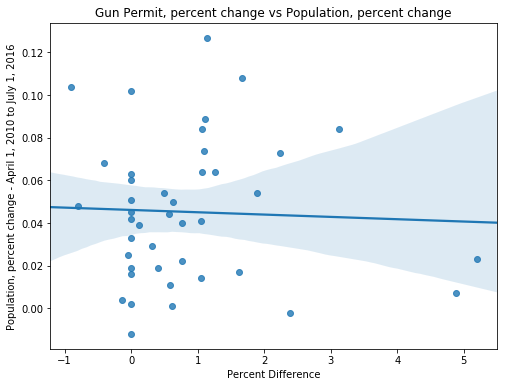

In [33]:
plot_regplot(gun_permit_change_filtered['Percent Difference'] ,gun_permit_change_filtered['Population, percent change - April 1, 2010 to July 1, 2016'], 'Gun Permit, percent change vs Population, percent change')

>This cell plotted the percent growth of gun permits per state against the percent growth of population per state in a scatterplot. It appears from the scatterplot that there is a positive correlation between the two variables, however the correlation is loose, there are several states that have a negative correlation and many that have no correlation.

In [34]:
gun_permit_change_filtered['Percent Difference'].corr(gun_permit_change_filtered['Population, percent change - April 1, 2010 to July 1, 2016'])

-0.041489403019068963

>Taking the correlation between the variables reveals that there is actually a very loose negative correlation between them. According to this data, there is a very slight negative correlation between the population growth per state and the growth in number of gun permits per state, although it is very weak. This goes against my intuition and guess as to how these variables would be related.

### What is the correlation between the percent population with a Bachelor's Degree or higher and the percentage of gun permits per state?

In [35]:
gun_permits_temp = gun_data[['month','state', 'permit']]

>This cell creates a new dataframe, gun_permits_temp, which includes the columns 'month', 'state', and 'permit' from gun_data.

In [36]:
gun_permits_temp = gun_permits_temp.pivot(index='state', columns='month')

>This cell pivots the gun_permits_temp table so that the 'state' column becomes the index and the unique values from the 'month' column become the column headers.

In [37]:
gun_permits_mean = pd.DataFrame(gun_permits_temp.mean(axis=1), columns=['mean permits'])

>This cell calculates the mean number of permits per state across all months and puts them into a dataframe.

In [38]:
gun_permits_mean = gun_permits_mean.join(census_data_sample[["Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015", 
     'Population estimates base, April 1, 2010', 'Population estimates, July 1, 2016']])

>This cell joins the bachelor's degree percentage, the population estimates in 2010, and the population estimates in 2016 per state with gun_permits_mean on the index 'state'.

In [39]:
gun_permits_mean['permits/pop percentage'] = gun_permits_mean['mean permits'].div(gun_permits_mean[['Population estimates base, April 1, 2010', 
                                                                                                    'Population estimates, July 1, 2016']].mean(axis=1))

>This cell calculates the percentage of gun permits per population per state and puts them into a new column 'permits/pop percentage'. This calculation gives a more accurate representation of the number of gun permits compared to percentage of bachelor's degree than just the number of gun permits per state.

Text(0.5,1,'Permits/Pop Percentage by State')

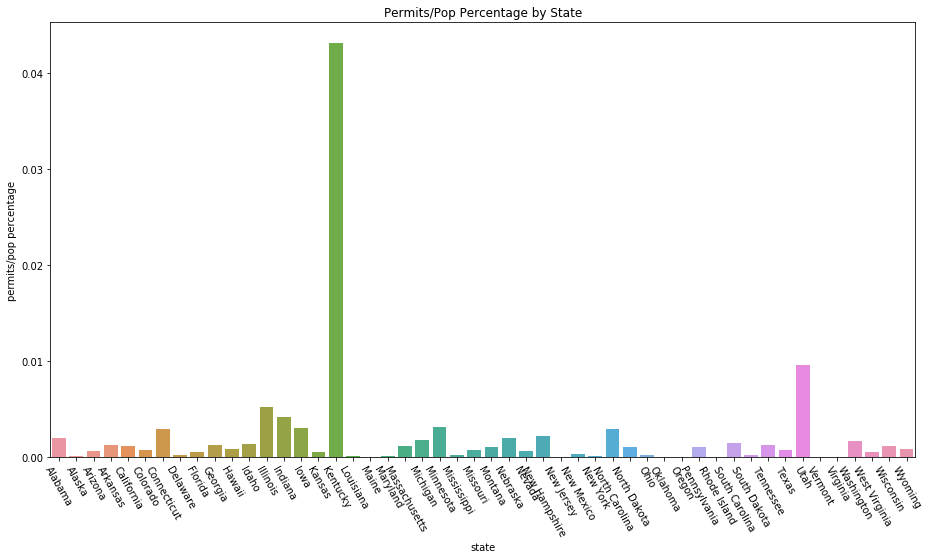

In [48]:
plt.figure(figsize=(15.5,8))
plt.xticks(rotation=-60)
sns.barplot(x=gun_permits_mean.index, y=gun_permits_mean['permits/pop percentage']).set_title('Permits/Pop Percentage by State')

Text(0.5,1,'Permits/Pop Percentage vs Bachelors Degree or higher, percentage')

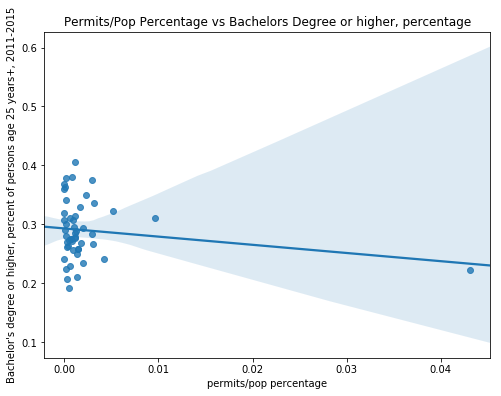

In [40]:
plot_regplot(gun_permits_mean['permits/pop percentage'], 
             gun_permits_mean["Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015"], 
             'Permits/Pop Percentage vs Bachelors Degree or higher, percentage')

In [41]:
gun_permits_mean['permits/pop percentage'].corr(gun_permits_mean["Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015"])

-0.17288124761724011

>These two cells plot the permits per population percentage and the bachelor's degree percentage on a scatterplot, and show the correlation between these two variables. As expected in my hypothesis the two variables are negatively correlated, as shown by the scatterplot and the correlation coefficient.

### What is the correlation between the median household income and the percentage of gun permits per state?

Text(0.5,1,'Permits/Pop Percentage vs Median Household Income')

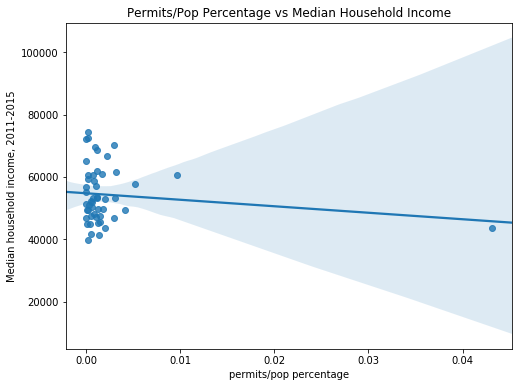

In [42]:
plot_regplot(gun_permits_mean['permits/pop percentage'], census_data_sample['Median household income, 2011-2015'],
             'Permits/Pop Percentage vs Median Household Income')

In [43]:
gun_permits_mean['permits/pop percentage'].corr(census_data_sample['Median household income, 2011-2015'])

-0.14308404995159199

>These two cells show a scatterplot of the percentage of permits against the median household income per state and the correlation between these two variables. As expected, these variables compare similarly to the previous comparison between percentage of permits and percentage of bachelor's degrees, that is a weak negative correlation.

<a id='conclusions'></a>
## Conclusions

> In conclusion, there may be a correlation between gun data and higher education and household income per state. According to my graphs and research it appears like as more people have bachelor's degrees and median household incomes is higher, less people tend to obtain permits for guns. There was such a small correlation between population growth and the growth of gun permits being obtained that it's difficult to draw a conclusion from this research. More research would have to be done to draw any concrete conclusions from any of this data. My conclusions and results are tentative and do not show causation, only correlation.

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0